### Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

### Load Dataset

In [2]:
df = pd.read_csv("hw1_dataset.csv")
df.insert(0, 'x0', 1)
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,1,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,1,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [44]:
y= df['y']
df_new= df[['x0','x1', 'x2','x3','x4', 'x5', 'x6']]

In [45]:
#splitting df into 5 folds matrix
df1 = df_new.loc[0:59]
df2 = df_new.loc[60:119]
df3 = df_new.loc[120:179]
df4 = df_new.loc[180:239]
df5 = df_new.loc[240:299]

y1 = y.loc[0:59]
y2 = y.loc[60:119]
y3 = y.loc[120:179]
y4 = y.loc[180:239]
y5 = y.loc[240:299]

df_fold1=np.concatenate([df1,df2,df3], axis=0)
df_fold2=np.concatenate([df2,df3,df4], axis=0)
df_fold3=np.concatenate([df3,df4,df5], axis=0)
df_fold4=np.concatenate([df4,df5,df1], axis=0)
df_fold5=np.concatenate([df5,df1,df2], axis=0)

y_fold1= np.concatenate([y1,y2,y3], axis=0).T
y_fold2= np.concatenate([y2,y3,y4], axis=0).T
y_fold3= np.concatenate([y3,y4,y5], axis=0).T
y_fold4= np.concatenate([y4,y5,y1], axis=0).T
y_fold5= np.concatenate([y5,y1,y2], axis=0).T

In [146]:
#Feature set 1
#Fold1
thetaj=np.random.rand(df_new.shape[1],1)*.01              #6,1

cost = np.zeros(shape=(1,100))
val_cost=np.zeros(shape=(1,100))
accuracy=np.zeros(shape=(1,100))
i=0
alpha=0.000001
m=180
m2=60
for i in range(100):
    #training
    hyp = 1.0/(1+np.exp(np.dot(df_fold1, thetaj)))
    cost[0][i] = (-1/m) * np.sum((np.dot(y_fold1, np.log(hyp))+ np.dot((1-y_fold1), np.log(1-hyp))))
    
    #validation
    y4 = y4.reshape((y4.shape[0], 1))
    hyp_val = 1.0/(1+np.exp(np.dot(df4, thetaj)))
    val_cost[0][i] = (-1/m2) * np.sum((np.dot(y4.T, np.log(hyp_val))+ np.dot((1-y4).T, np.log(1-hyp_val))))    
   
    #test
    hyp_test = 1.0/(1+np.exp(np.dot(df5, -thetaj)))

    y5 = y5.reshape((y5.shape[0], 1))
    accuracy[0][i] = 100 - (np.mean(np.abs((hyp_test-y5))) * 100)
    
    thetaj = (thetaj - (alpha/m) * (np.dot(((y_fold1.reshape(-1, 1)) - hyp).T, df_fold1)).T)
accuracy

array([[56.23628433, 56.21900525, 56.20108828, 56.18251508, 56.1632673 ,
        56.14332652, 56.12267439, 56.1012926 , 56.07916303, 56.05626772,
        56.03258899, 56.0081095 , 55.98281231, 55.95668097, 55.9296996 ,
        55.90185296, 55.87312657, 55.84350676, 55.8129808 , 55.78153698,
        55.74916469, 55.71585455, 55.68159851, 55.64638992, 55.61022363,
        55.57309613, 55.53500558, 55.49595197, 55.45593713, 55.41496487,
        55.37304104, 55.33017355, 55.28637251, 55.2416502 , 55.19602115,
        55.14950216, 55.10211231, 55.05387294, 55.00480769, 54.95494242,
        54.90430521, 54.85292627, 54.80083792, 54.74807446, 54.69467209,
        54.64066882, 54.58610432, 54.5310198 , 54.47545789, 54.41946243,
        54.36307835, 54.30635151, 54.24932849, 54.19205643, 54.13458287,
        54.07695551, 54.01922212, 53.96143028, 53.90362723, 53.84585973,
        53.78817386, 53.73061489, 53.67322713, 53.61605376, 53.55913677,
        53.50251679, 53.44623299, 53.39032304, 53.3

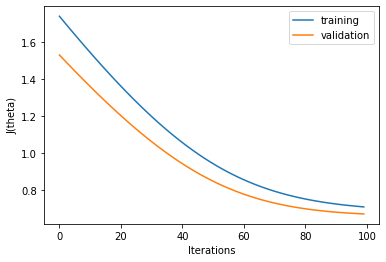

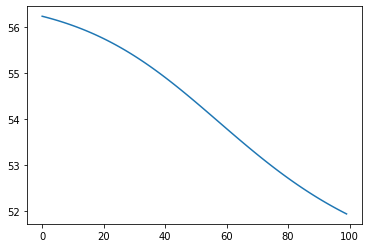

In [147]:
# Prepare the data
x = np.linspace(0, 99, 100)

# Plot the data
plt.plot(x, cost.T, label='training')
plt.plot(x, val_cost.T, label='validation')
plt.ylabel('J(theta)')
plt.xlabel('Iterations')

plt.legend()
plt.show()

plt.plot(x, accuracy.T, label='Accuracy')
plt.show()

In [148]:
#Fold2
thetaj=np.random.rand(df_new.shape[1],1)*.01              #6,1

cost = np.zeros(shape=(1,100))
val_cost=np.zeros(shape=(1,100))
accuracy=np.zeros(shape=(1,100))
i=0
alpha=0.000001
m=180
m2=60
for i in range(100):
    #training
    hyp = 1.0/(1+np.exp(np.dot(df_fold2, thetaj)))
    cost[0][i] = (-1/m) * np.sum((np.dot(y_fold2, np.log(hyp))+ np.dot((1-y_fold2), np.log(1-hyp))))
    
    #validation
    y5 = y5.reshape((y5.shape[0], 1))
    hyp_val = 1.0/(1+np.exp(np.dot(df5, thetaj)))
    val_cost[0][i] = (-1/m2) * np.sum((np.dot(y5.T, np.log(hyp_val))+ np.dot((1-y5).T, np.log(1-hyp_val))))    
   
    #test
    hyp_test = 1.0/(1+np.exp(np.dot(df1, -thetaj)))

    y1 = y1.reshape((y1.shape[0], 1))
    accuracy[0][i] = 100 - (np.mean(np.abs((hyp_test-y1))) * 100)
    
    thetaj = (thetaj - (alpha/m) * (np.dot(((y_fold2.reshape(-1, 1)) - hyp).T, df_fold2)).T)

use matplotlib 
plt to implement cost vs iteration graph

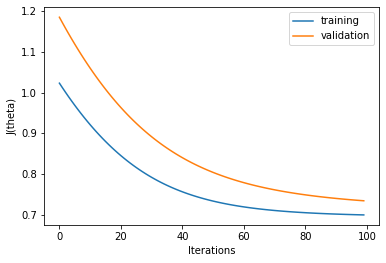

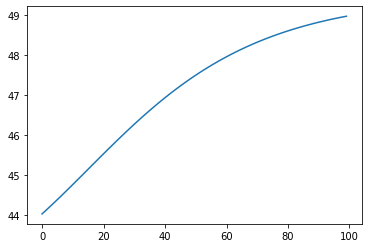

In [149]:
# Prepare the data
x = np.linspace(0, 99, 100)

# Plot the data
plt.plot(x, cost.T, label='training')
plt.plot(x, val_cost.T, label='validation')
plt.ylabel('J(theta)')
plt.xlabel('Iterations')

plt.legend()
plt.show()

plt.plot(x, accuracy.T, label='Accuracy')
plt.show()

In [150]:
#Fold3
thetaj=np.random.rand(df_new.shape[1],1)*.01              #6,1

cost = np.zeros(shape=(1,100))
val_cost=np.zeros(shape=(1,100))
accuracy=np.zeros(shape=(1,100))
i=0
alpha=0.000001
m=180
m2=60
for i in range(100):
    #training
    hyp = 1.0/(1+np.exp(np.dot(df_fold3, thetaj)))
    cost[0][i] = (-1/m) * np.sum((np.dot(y_fold3, np.log(hyp))+ np.dot((1-y_fold3), np.log(1-hyp))))
    
    #validation
    y1 = y1.reshape((y1.shape[0], 1))
    hyp_val = 1.0/(1+np.exp(np.dot(df1, thetaj)))
    val_cost[0][i] = (-1/m2) * np.sum((np.dot(y1.T, np.log(hyp_val))+ np.dot((1-y1).T, np.log(1-hyp_val))))    
   
    #test
    hyp_test = 1.0/(1+np.exp(np.dot(df2, -thetaj)))

    y2 = y2.reshape((y2.shape[0], 1))
    accuracy[0][i] = 100 - (np.mean(np.abs((hyp_test-y2))) * 100)
    
    thetaj = (thetaj - (alpha/m) * (np.dot(((y_fold3.reshape(-1, 1)) - hyp).T, df_fold3)).T)

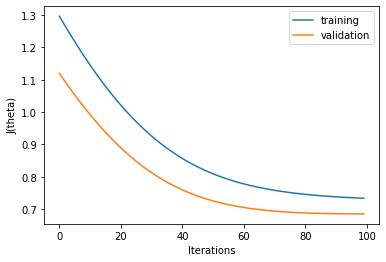

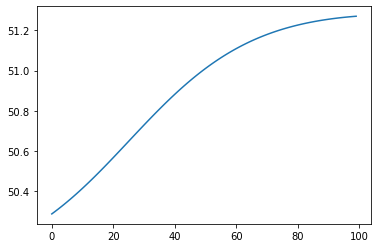

In [151]:
# Prepare the data
x = np.linspace(0, 99, 100)

# Plot the data
plt.plot(x, cost.T, label='training')
plt.plot(x, val_cost.T, label='validation')
plt.ylabel('J(theta)')
plt.xlabel('Iterations')

plt.legend()
plt.show()

plt.plot(x, accuracy.T, label='Accuracy')
plt.show()

In [152]:
#Fold4
thetaj=np.random.rand(df_new.shape[1],1)*.01              #6,1

cost = np.zeros(shape=(1,100))
val_cost=np.zeros(shape=(1,100))
accuracy=np.zeros(shape=(1,100))
i=0
alpha=0.000001
m=180
m2=60
for i in range(100):
    #training
    hyp = 1.0/(1+np.exp(np.dot(df_fold4, thetaj)))
    cost[0][i] = (-1/m) * np.sum((np.dot(y_fold4, np.log(hyp))+ np.dot((1-y_fold4), np.log(1-hyp))))
    
    #validation
    y2 = y2.reshape((y2.shape[0], 1))
    hyp_val = 1.0/(1+np.exp(np.dot(df2, thetaj)))
    val_cost[0][i] = (-1/m2) * np.sum((np.dot(y2.T, np.log(hyp_val))+ np.dot((1-y2).T, np.log(1-hyp_val))))    
   
    #test
    hyp_test = 1.0/(1+np.exp(np.dot(df3, -thetaj)))

    y3 = y3.reshape((y3.shape[0], 1))
    accuracy[0][i] = 100 - (np.mean(np.abs((hyp_test-y3))) * 100)
    
    thetaj = (thetaj - (alpha/m) * (np.dot(((y_fold4.reshape(-1, 1)) - hyp).T, df_fold4)).T)

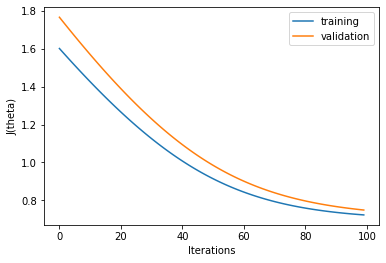

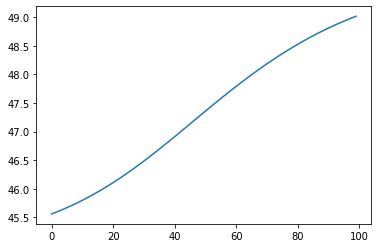

In [153]:
# Prepare the data
x = np.linspace(0, 99, 100)

# Plot the data
plt.plot(x, cost.T, label='training')
plt.plot(x, val_cost.T, label='validation')
plt.ylabel('J(theta)')
plt.xlabel('Iterations')

plt.legend()
plt.show()

plt.plot(x, accuracy.T, label='Accuracy')
plt.show()

In [154]:
#Fold5
thetaj=np.random.rand(df_new.shape[1],1)*.01              #6,1

cost = np.zeros(shape=(1,100))
val_cost=np.zeros(shape=(1,100))
accuracy=np.zeros(shape=(1,100))
i=0
alpha=0.000001
m=180
m2=60
for i in range(100):
    #training
    hyp = 1.0/(1+np.exp(np.dot(df_fold5, thetaj)))
    cost[0][i] = (-1/m) * np.sum((np.dot(y_fold5, np.log(hyp))+ np.dot((1-y_fold5), np.log(1-hyp))))
    
    #validation
    y3 = y3.reshape((y3.shape[0], 1))
    hyp_val = 1.0/(1+np.exp(np.dot(df3, thetaj)))
    val_cost[0][i] = (-1/m2) * np.sum((np.dot(y3.T, np.log(hyp_val))+ np.dot((1-y3).T, np.log(1-hyp_val))))    
   
    #test
    hyp_test = 1.0/(1+np.exp(np.dot(df4, -thetaj)))

    y4 = y4.reshape((y4.shape[0], 1))
    accuracy[0][i] = 100 - (np.mean(np.abs((hyp_test-y4))) * 100)
    
    thetaj = (thetaj - (alpha/m) * (np.dot(((y_fold5.reshape(-1, 1)) - hyp).T, df_fold5)).T)

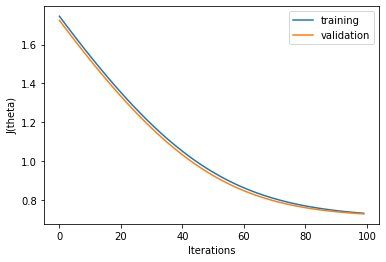

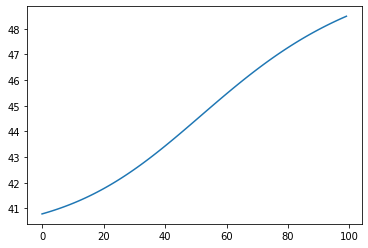

In [155]:
# Prepare the data
x = np.linspace(0, 99, 100)

# Plot the data
plt.plot(x, cost.T, label='training')
plt.plot(x, val_cost.T, label='validation')
plt.ylabel('J(theta)')
plt.xlabel('Iterations')

plt.legend()
plt.show()

plt.plot(x, accuracy.T, label='Accuracy')
plt.show()

In [85]:
#Feature Set 2
df = pd.read_csv("hw1_dataset.csv")
df.insert(0, 'x0', 1)
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,1,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,1,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [87]:
y= df['y']
df_new= df[['x0','x1', 'x2','x3','x4', 'x5', 'x6', 'x7']]

In [88]:
#splitting df into 5 folds matrix
df1 = df_new.loc[0:59]
df2 = df_new.loc[60:119]
df3 = df_new.loc[120:179]
df4 = df_new.loc[180:239]
df5 = df_new.loc[240:299]

y1 = y.loc[0:59]
y2 = y.loc[60:119]
y3 = y.loc[120:179]
y4 = y.loc[180:239]
y5 = y.loc[240:299]

df_fold1=np.concatenate([df1,df2,df3], axis=0)
df_fold2=np.concatenate([df2,df3,df4], axis=0)
df_fold3=np.concatenate([df3,df4,df5], axis=0)
df_fold4=np.concatenate([df4,df5,df1], axis=0)
df_fold5=np.concatenate([df5,df1,df2], axis=0)

y_fold1= np.concatenate([y1,y2,y3], axis=0).T
y_fold2= np.concatenate([y2,y3,y4], axis=0).T
y_fold3= np.concatenate([y3,y4,y5], axis=0).T
y_fold4= np.concatenate([y4,y5,y1], axis=0).T
y_fold5= np.concatenate([y5,y1,y2], axis=0).T

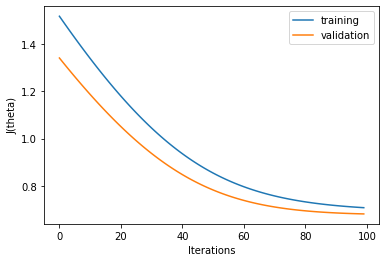

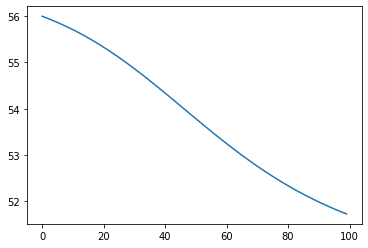

In [157]:
#Feature set 2
#Fold1
thetaj=np.random.rand(df_new.shape[1],1)*.01              #6,1

cost = np.zeros(shape=(1,100))
val_cost=np.zeros(shape=(1,100))
accuracy=np.zeros(shape=(1,100))
i=0
alpha=0.000001
m=180
m2=60
for i in range(100):
    #training
    hyp = 1.0/(1+np.exp(np.dot(df_fold1, thetaj)))
    cost[0][i] = (-1/m) * np.sum((np.dot(y_fold1, np.log(hyp))+ np.dot((1-y_fold1), np.log(1-hyp))))
    
    #validation
    y4 = y4.reshape((y4.shape[0], 1))
    hyp_val = 1.0/(1+np.exp(np.dot(df4, thetaj)))
    val_cost[0][i] = (-1/m2) * np.sum((np.dot(y4.T, np.log(hyp_val))+ np.dot((1-y4).T, np.log(1-hyp_val))))    
   
    #test
    hyp_test = 1.0/(1+np.exp(np.dot(df5, -thetaj)))

    y5 = y5.reshape((y5.shape[0], 1))
    accuracy[0][i] = 100 - (np.mean(np.abs((hyp_test-y5))) * 100)
    
    thetaj = (thetaj - (alpha/m) * (np.dot(((y_fold1.reshape(-1, 1)) - hyp).T, df_fold1)).T)


# Prepare the data
x = np.linspace(0, 99, 100)

# Plot the data
plt.plot(x, cost.T, label='training')
plt.plot(x, val_cost.T, label='validation')
plt.ylabel('J(theta)')
plt.xlabel('Iterations')

plt.legend()
plt.show()

plt.plot(x, accuracy.T, label='Accuracy')
plt.show()

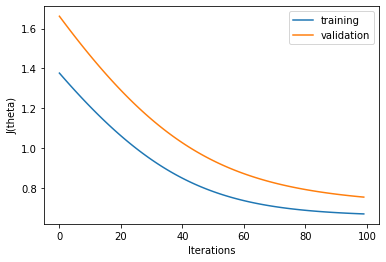

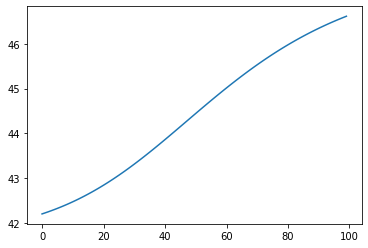

In [158]:
#Fold2
thetaj=np.random.rand(df_new.shape[1],1)*.01              #6,1

cost = np.zeros(shape=(1,100))
val_cost=np.zeros(shape=(1,100))
accuracy=np.zeros(shape=(1,100))
i=0
alpha=0.000001
m=180
m2=60
for i in range(100):
    #training
    hyp = 1.0/(1+np.exp(np.dot(df_fold2, thetaj)))
    cost[0][i] = (-1/m) * np.sum((np.dot(y_fold2, np.log(hyp))+ np.dot((1-y_fold2), np.log(1-hyp))))
    
    #validation
    y5 = y5.reshape((y5.shape[0], 1))
    hyp_val = 1.0/(1+np.exp(np.dot(df5, thetaj)))
    val_cost[0][i] = (-1/m2) * np.sum((np.dot(y5.T, np.log(hyp_val))+ np.dot((1-y5).T, np.log(1-hyp_val))))    
   
    #test
    hyp_test = 1.0/(1+np.exp(np.dot(df1, -thetaj)))

    y1 = y1.reshape((y1.shape[0], 1))
    accuracy[0][i] = 100 - (np.mean(np.abs((hyp_test-y1))) * 100)
    
    thetaj = (thetaj - (alpha/m) * (np.dot(((y_fold2.reshape(-1, 1)) - hyp).T, df_fold2)).T)

# Prepare the data
x = np.linspace(0, 99, 100)

# Plot the data
plt.plot(x, cost.T, label='training')
plt.plot(x, val_cost.T, label='validation')
plt.ylabel('J(theta)')
plt.xlabel('Iterations')

plt.legend()
plt.show()

plt.plot(x, accuracy.T, label='Accuracy')
plt.show()



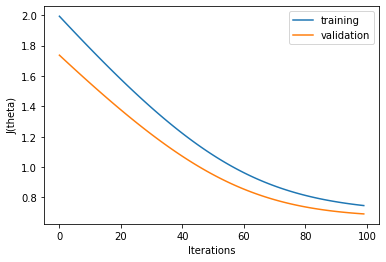

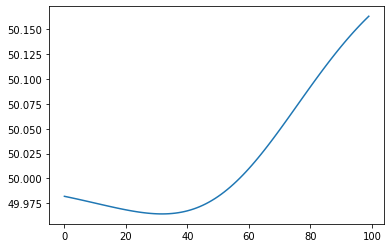

In [159]:
#Fold3
thetaj=np.random.rand(df_new.shape[1],1)*.01              #6,1

cost = np.zeros(shape=(1,100))
val_cost=np.zeros(shape=(1,100))
accuracy=np.zeros(shape=(1,100))
i=0
alpha=0.000001
m=180
m2=60
for i in range(100):
    #training
    hyp = 1.0/(1+np.exp(np.dot(df_fold3, thetaj)))
    cost[0][i] = (-1/m) * np.sum((np.dot(y_fold3, np.log(hyp))+ np.dot((1-y_fold3), np.log(1-hyp))))
    
    #validation
    y1 = y1.reshape((y1.shape[0], 1))
    hyp_val = 1.0/(1+np.exp(np.dot(df1, thetaj)))
    val_cost[0][i] = (-1/m2) * np.sum((np.dot(y1.T, np.log(hyp_val))+ np.dot((1-y1).T, np.log(1-hyp_val))))    
   
    #test
    hyp_test = 1.0/(1+np.exp(np.dot(df2, -thetaj)))

    y2 = y2.reshape((y2.shape[0], 1))
    accuracy[0][i] = 100 - (np.mean(np.abs((hyp_test-y2))) * 100)
    
    thetaj = (thetaj - (alpha/m) * (np.dot(((y_fold3.reshape(-1, 1)) - hyp).T, df_fold3)).T)

# Prepare the data
x = np.linspace(0, 99, 100)

# Plot the data
plt.plot(x, cost.T, label='training')
plt.plot(x, val_cost.T, label='validation')
plt.ylabel('J(theta)')
plt.xlabel('Iterations')

plt.legend()
plt.show()

plt.plot(x, accuracy.T, label='Accuracy')
plt.show()

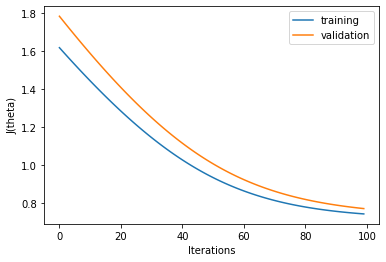

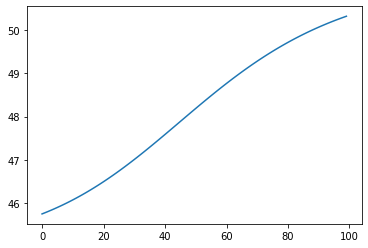

In [160]:
#Fold4
thetaj=np.random.rand(df_new.shape[1],1)*.01              #6,1

cost = np.zeros(shape=(1,100))
val_cost=np.zeros(shape=(1,100))
accuracy=np.zeros(shape=(1,100))
i=0
alpha=0.000001
m=180
m2=60
for i in range(100):
    #training
    hyp = 1.0/(1+np.exp(np.dot(df_fold4, thetaj)))
    cost[0][i] = (-1/m) * np.sum((np.dot(y_fold4, np.log(hyp))+ np.dot((1-y_fold4), np.log(1-hyp))))
    
    #validation
    y2 = y2.reshape((y2.shape[0], 1))
    hyp_val = 1.0/(1+np.exp(np.dot(df2, thetaj)))
    val_cost[0][i] = (-1/m2) * np.sum((np.dot(y2.T, np.log(hyp_val))+ np.dot((1-y2).T, np.log(1-hyp_val))))    
   
    #test
    hyp_test = 1.0/(1+np.exp(np.dot(df3, -thetaj)))

    y3 = y3.reshape((y3.shape[0], 1))
    accuracy[0][i] = 100 - (np.mean(np.abs((hyp_test-y3))) * 100)
    
    thetaj = (thetaj - (alpha/m) * (np.dot(((y_fold4.reshape(-1, 1)) - hyp).T, df_fold4)).T)

# Prepare the data
x = np.linspace(0, 99, 100)

# Plot the data
plt.plot(x, cost.T, label='training')
plt.plot(x, val_cost.T, label='validation')
plt.ylabel('J(theta)')
plt.xlabel('Iterations')

plt.legend()
plt.show()

plt.plot(x, accuracy.T, label='Accuracy')
plt.show()

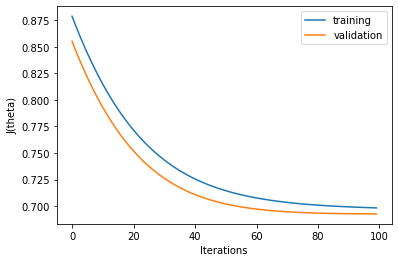

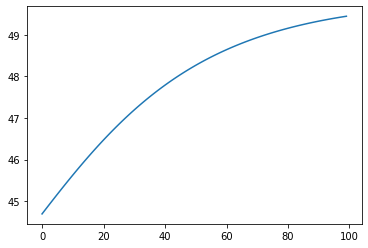

In [161]:
#Fold5
thetaj=np.random.rand(df_new.shape[1],1)*.01              #6,1

cost = np.zeros(shape=(1,100))
val_cost=np.zeros(shape=(1,100))
accuracy=np.zeros(shape=(1,100))
i=0
alpha=0.000001
m=180
m2=60
for i in range(100):
    #training
    hyp = 1.0/(1+np.exp(np.dot(df_fold5, thetaj)))
    cost[0][i] = (-1/m) * np.sum((np.dot(y_fold5, np.log(hyp))+ np.dot((1-y_fold5), np.log(1-hyp))))
    
    #validation
    y3 = y3.reshape((y3.shape[0], 1))
    hyp_val = 1.0/(1+np.exp(np.dot(df3, thetaj)))
    val_cost[0][i] = (-1/m2) * np.sum((np.dot(y3.T, np.log(hyp_val))+ np.dot((1-y3).T, np.log(1-hyp_val))))    
   
    #test
    hyp_test = 1.0/(1+np.exp(np.dot(df4, -thetaj)))

    y4 = y4.reshape((y4.shape[0], 1))
    accuracy[0][i] = 100 - (np.mean(np.abs((hyp_test-y4))) * 100)
    
    thetaj = (thetaj - (alpha/m) * (np.dot(((y_fold5.reshape(-1, 1)) - hyp).T, df_fold5)).T)

# Prepare the data
x = np.linspace(0, 99, 100)

# Plot the data
plt.plot(x, cost.T, label='training')
plt.plot(x, val_cost.T, label='validation')
plt.ylabel('J(theta)')
plt.xlabel('Iterations')

plt.legend()
plt.show()

plt.plot(x, accuracy.T, label='Accuracy')
plt.show()


In [113]:
df = pd.read_csv("hw1_dataset.csv")
df.insert(0, 'x0', 1)
df.head()

y= df['y']
df_new= df[['x0','x1', 'x2','x3','x4', 'x5', 'x6', 'x7', 'x8']]

In [114]:
#splitting df into 5 folds matrix
df1 = df_new.loc[0:59]
df2 = df_new.loc[60:119]
df3 = df_new.loc[120:179]
df4 = df_new.loc[180:239]
df5 = df_new.loc[240:299]

y1 = y.loc[0:59]
y2 = y.loc[60:119]
y3 = y.loc[120:179]
y4 = y.loc[180:239]
y5 = y.loc[240:299]

df_fold1=np.concatenate([df1,df2,df3], axis=0)
df_fold2=np.concatenate([df2,df3,df4], axis=0)
df_fold3=np.concatenate([df3,df4,df5], axis=0)
df_fold4=np.concatenate([df4,df5,df1], axis=0)
df_fold5=np.concatenate([df5,df1,df2], axis=0)

y_fold1= np.concatenate([y1,y2,y3], axis=0).T
y_fold2= np.concatenate([y2,y3,y4], axis=0).T
y_fold3= np.concatenate([y3,y4,y5], axis=0).T
y_fold4= np.concatenate([y4,y5,y1], axis=0).T
y_fold5= np.concatenate([y5,y1,y2], axis=0).T

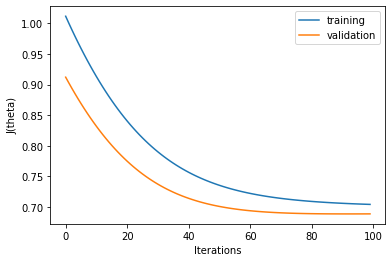

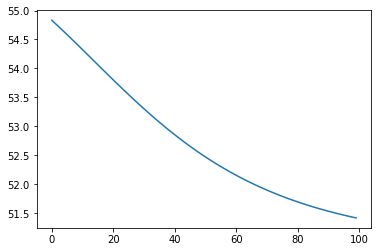

In [162]:
#Feature set 3
#Fold1
thetaj=np.random.rand(df_new.shape[1],1)*.01              #6,1

cost = np.zeros(shape=(1,100))
val_cost=np.zeros(shape=(1,100))
accuracy=np.zeros(shape=(1,100))
i=0
alpha=0.000001
m=180
m2=60
for i in range(100):
    #training
    hyp = 1.0/(1+np.exp(np.dot(df_fold1, thetaj)))
    cost[0][i] = (-1/m) * np.sum((np.dot(y_fold1, np.log(hyp))+ np.dot((1-y_fold1), np.log(1-hyp))))
    
    #validation
    y4 = y4.reshape((y4.shape[0], 1))
    hyp_val = 1.0/(1+np.exp(np.dot(df4, thetaj)))
    val_cost[0][i] = (-1/m2) * np.sum((np.dot(y4.T, np.log(hyp_val))+ np.dot((1-y4).T, np.log(1-hyp_val))))    
   
    #test
    hyp_test = 1.0/(1+np.exp(np.dot(df5, -thetaj)))

    y5 = y5.reshape((y5.shape[0], 1))
    accuracy[0][i] = 100 - (np.mean(np.abs((hyp_test-y5))) * 100)
    
    thetaj = (thetaj - (alpha/m) * (np.dot(((y_fold1.reshape(-1, 1)) - hyp).T, df_fold1)).T)


# Prepare the data
x = np.linspace(0, 99, 100)

# Plot the data
plt.plot(x, cost.T, label='training')
plt.plot(x, val_cost.T, label='validation')
plt.ylabel('J(theta)')
plt.xlabel('Iterations')

plt.legend()
plt.show()

plt.plot(x, accuracy.T, label='Accuracy')
plt.show()

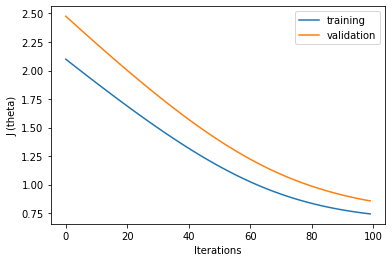

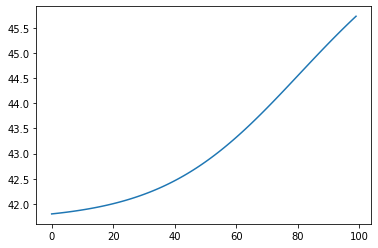

In [163]:
#Fold2
thetaj=np.random.rand(df_new.shape[1],1)*.01              #6,1

cost = np.zeros(shape=(1,100))
val_cost=np.zeros(shape=(1,100))
accuracy=np.zeros(shape=(1,100))
i=0
alpha=0.000001
m=180
m2=60
for i in range(100):
    #training
    hyp = 1.0/(1+np.exp(np.dot(df_fold2, thetaj)))
    cost[0][i] = (-1/m) * np.sum((np.dot(y_fold2, np.log(hyp))+ np.dot((1-y_fold2), np.log(1-hyp))))
    
    #validation
    y5 = y5.reshape((y5.shape[0], 1))
    hyp_val = 1.0/(1+np.exp(np.dot(df5, thetaj)))
    val_cost[0][i] = (-1/m2) * np.sum((np.dot(y5.T, np.log(hyp_val))+ np.dot((1-y5).T, np.log(1-hyp_val))))    
   
    #test
    hyp_test = 1.0/(1+np.exp(np.dot(df1, -thetaj)))

    y1 = y1.reshape((y1.shape[0], 1))
    accuracy[0][i] = 100 - (np.mean(np.abs((hyp_test-y1))) * 100)
    
    thetaj = (thetaj - (alpha/m) * (np.dot(((y_fold2.reshape(-1, 1)) - hyp).T, df_fold2)).T)

# Prepare the data
x = np.linspace(0, 99, 100)

# Plot the data
plt.plot(x, cost.T, label='training')
plt.plot(x, val_cost.T, label='validation')
plt.ylabel('J(theta)')
plt.xlabel('Iterations')

plt.legend()
plt.show()

plt.plot(x, accuracy.T, label='Accuracy')
plt.show()

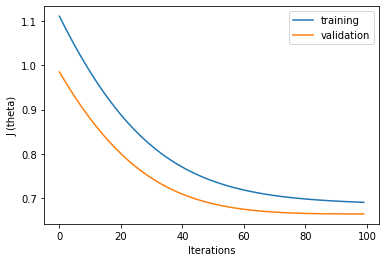

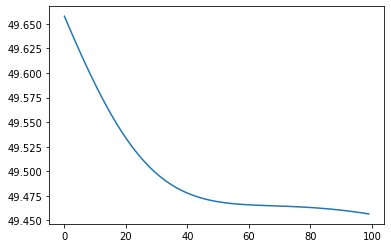

In [164]:
#Fold3
thetaj=np.random.rand(df_new.shape[1],1)*.01              #6,1

cost = np.zeros(shape=(1,100))
val_cost=np.zeros(shape=(1,100))
accuracy=np.zeros(shape=(1,100))
i=0
alpha=0.000001
m=180
m2=60
for i in range(100):
    #training
    hyp = 1.0/(1+np.exp(np.dot(df_fold3, thetaj)))
    cost[0][i] = (-1/m) * np.sum((np.dot(y_fold3, np.log(hyp))+ np.dot((1-y_fold3), np.log(1-hyp))))
    
    #validation
    y1 = y1.reshape((y1.shape[0], 1))
    hyp_val = 1.0/(1+np.exp(np.dot(df1, thetaj)))
    val_cost[0][i] = (-1/m2) * np.sum((np.dot(y1.T, np.log(hyp_val))+ np.dot((1-y1).T, np.log(1-hyp_val))))    
   
    #test
    hyp_test = 1.0/(1+np.exp(np.dot(df2, -thetaj)))

    y2 = y2.reshape((y2.shape[0], 1))
    accuracy[0][i] = 100 - (np.mean(np.abs((hyp_test-y2))) * 100)
    
    thetaj = (thetaj - (alpha/m) * (np.dot(((y_fold3.reshape(-1, 1)) - hyp).T, df_fold3)).T)

# Prepare the data
x = np.linspace(0, 99, 100)

# Plot the data
plt.plot(x, cost.T, label='training')
plt.plot(x, val_cost.T, label='validation')
plt.ylabel('J(theta)')
plt.xlabel('Iterations')

plt.legend()
plt.show()

plt.plot(x, accuracy.T, label='Accuracy')
plt.show()

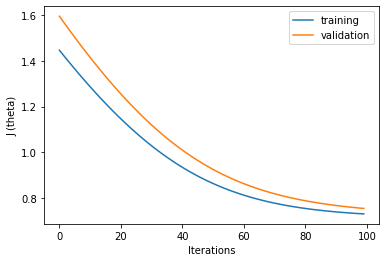

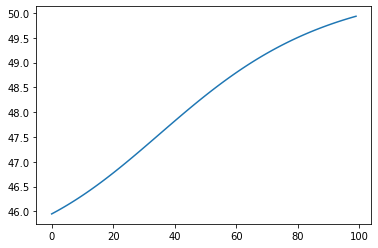

In [165]:
#Fold4
thetaj=np.random.rand(df_new.shape[1],1)*.01              #6,1

cost = np.zeros(shape=(1,100))
val_cost=np.zeros(shape=(1,100))
accuracy=np.zeros(shape=(1,100))
i=0
alpha=0.000001
m=180
m2=60
for i in range(100):
    #training
    hyp = 1.0/(1+np.exp(np.dot(df_fold4, thetaj)))
    cost[0][i] = (-1/m) * np.sum((np.dot(y_fold4, np.log(hyp))+ np.dot((1-y_fold4), np.log(1-hyp))))
    
    #validation
    y2 = y2.reshape((y2.shape[0], 1))
    hyp_val = 1.0/(1+np.exp(np.dot(df2, thetaj)))
    val_cost[0][i] = (-1/m2) * np.sum((np.dot(y2.T, np.log(hyp_val))+ np.dot((1-y2).T, np.log(1-hyp_val))))    
   
    #test
    hyp_test = 1.0/(1+np.exp(np.dot(df3, -thetaj)))

    y3 = y3.reshape((y3.shape[0], 1))
    accuracy[0][i] = 100 - (np.mean(np.abs((hyp_test-y3))) * 100)
    
    thetaj = (thetaj - (alpha/m) * (np.dot(((y_fold4.reshape(-1, 1)) - hyp).T, df_fold4)).T)

# Prepare the data
x = np.linspace(0, 99, 100)

# Plot the data
plt.plot(x, cost.T, label='training')
plt.plot(x, val_cost.T, label='validation')
plt.ylabel('J(theta)')
plt.xlabel('Iterations')

plt.legend()
plt.show()

plt.plot(x, accuracy.T, label='Accuracy')
plt.show()


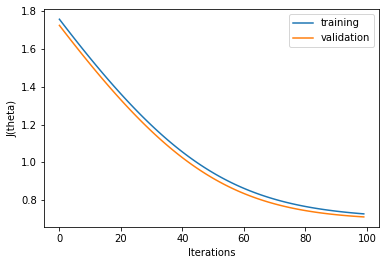

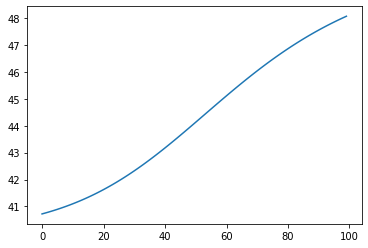

In [167]:
#Fold5
thetaj=np.random.rand(df_new.shape[1],1)*.01              #6,1

cost = np.zeros(shape=(1,100))
val_cost=np.zeros(shape=(1,100))
accuracy=np.zeros(shape=(1,100))
i=0
alpha=0.000001
m=180
m2=60
for i in range(100):
    #training
    hyp = 1.0/(1+np.exp(np.dot(df_fold5, thetaj)))
    cost[0][i] = (-1/m) * np.sum((np.dot(y_fold5, np.log(hyp))+ np.dot((1-y_fold5), np.log(1-hyp))))
    
    #validation
    y3 = y3.reshape((y3.shape[0], 1))
    hyp_val = 1.0/(1+np.exp(np.dot(df3, thetaj)))
    val_cost[0][i] = (-1/m2) * np.sum((np.dot(y3.T, np.log(hyp_val))+ np.dot((1-y3).T, np.log(1-hyp_val))))    
   
    #test
    hyp_test = 1.0/(1+np.exp(np.dot(df4, -thetaj)))

    y4 = y4.reshape((y4.shape[0], 1))
    accuracy[0][i] = 100 - (np.mean(np.abs((hyp_test-y4))) * 100)
    
    thetaj = (thetaj - (alpha/m) * (np.dot(((y_fold5.reshape(-1, 1)) - hyp).T, df_fold5)).T)

# Prepare the data
x = np.linspace(0, 99, 100)

# Plot the data
plt.plot(x, cost.T, label='training')
plt.plot(x, val_cost.T, label='validation')
plt.ylabel('J(theta)')
plt.xlabel('Iterations')

plt.legend()
plt.show()

plt.plot(x, accuracy.T, label='Accuracy')
plt.show()